In [2]:
# %load tutorial-part2.py
import sys
sys.path.append('/Users/alex/Documents/OpenPIV/alexlib/openpiv-python')

In [3]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import numpy as np
%matplotlib inline

/Users/alex/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


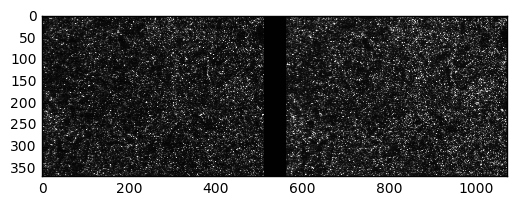

In [17]:
frame_a  = openpiv.tools.imread( 'exp1_001_a.bmp' )
frame_b  = openpiv.tools.imread( 'exp1_001_b.bmp' )
import pylab
pylab.imshow(np.c_[frame_a,np.ones((frame_a.shape[0],20)),frame_b],cmap=pylab.cm.gray)

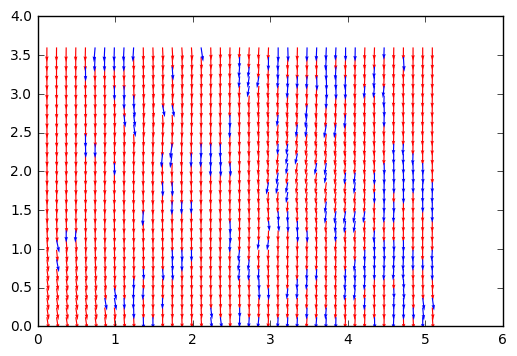

In [5]:
%%time
u, v, sig2noise = openpiv.process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=24, overlap=12, dt=0.02, search_area_size=64, sig2noise_method='peak2peak' )
x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = openpiv.filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = openpiv.scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
openpiv.tools.save(x, y, u, v, mask, 'exp1_001_extended.txt' )
openpiv.tools.display_vector_field('exp1_001_extended.txt', scale=100, width=0.0025)

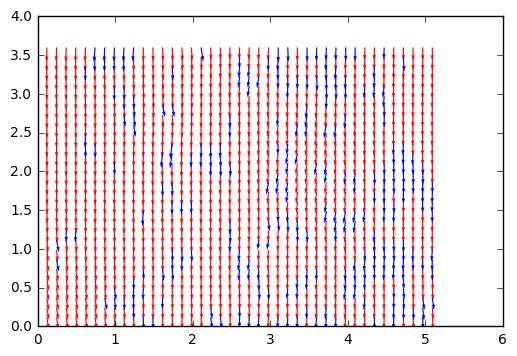

CPU times: user 1.18 s, sys: 18.3 ms, total: 1.2 s
Wall time: 1.21 s


In [8]:
%%time
u, v= openpiv.pyprocess.piv( frame_a, frame_b, corr_method='fft', window_size=24, overlap=12, dt=0.02, sig2noise_method='peak2peak' )
x, y = openpiv.pyprocess.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = openpiv.filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = openpiv.scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
openpiv.tools.save(x, y, u, v, mask, 'exp1_001_fft.txt' )
openpiv.tools.display_vector_field('exp1_001_fft.txt', scale=100, width=0.0025)

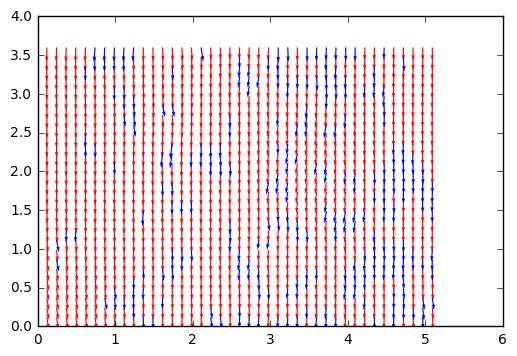

In [7]:
%%time
u, v= openpiv.pyprocess.piv( frame_a, frame_b, corr_method='direct', window_size=24, overlap=12, dt=0.02, sig2noise_method='peak2peak' )
x, y = openpiv.pyprocess.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = openpiv.filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = openpiv.scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
openpiv.tools.save(x, y, u, v, mask, 'exp1_001_direct.txt' )
openpiv.tools.display_vector_field('exp1_001_direct.txt', scale=100, width=0.0025)

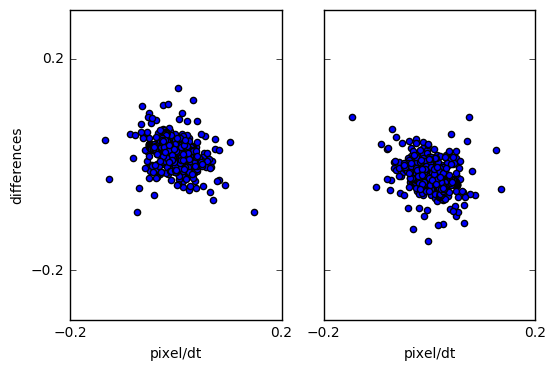

In [66]:
fig,ax = pylab.subplots(1,2,sharey = True,sharex=True)
ax[0].scatter(a[:,2]-b[:,2],a[:,3]-b[:,3])
ax[1].scatter(b[:,2]-c[:,2],b[:,3]-c[:,3])
ax[1].set_aspect(1)
ax[1].set_xticks([-.2,.2])
ax[1].set_yticks([-.2,.2])
ax[0].set_xlabel('pixel/dt')
ax[1].set_xlabel('pixel/dt')
ax[0].set_ylabel('differences');
